In [15]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

import Qubits

In [16]:
res_array = np.arange(5, 80, 2)
interations = 50

### The convergence of the Transmon eigenvalues in the flux basis

In [17]:
E0 = []
E1 = []
E2 = []
E3 = []
tF = []

for i in range(len(res_array)):
    transmonF = Qubits.transmon_flux(res_array[i], 0.02, 1, 0.5) #parameters (n, EC, EJ, ng)

    t = timeit.timeit(stmt=transmonF.solve, number=interations)
    tF.append((t/interations)*1000)#I multiply by 1000 to get the result in milliseconds
    transmonF.solve()
    energies = transmonF.eigvals

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])


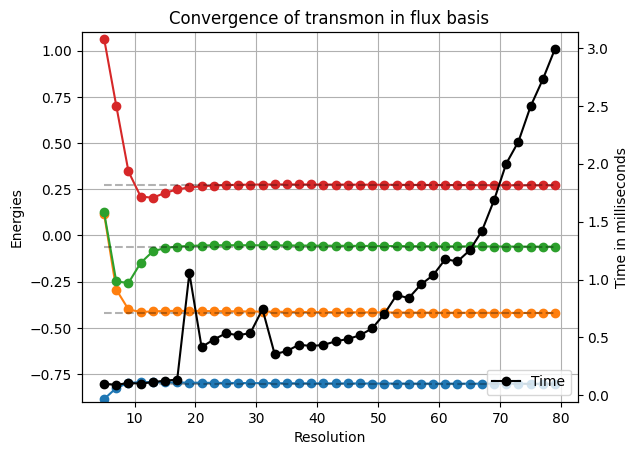

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(res_array, E0, '-o')
ax1.plot([res_array[0], res_array[-1]], [E0[-1], E0[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E1, '-o')
ax1.plot([res_array[0], res_array[-1]], [E1[-1], E1[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E2, '-o')
ax1.plot([res_array[0], res_array[-1]], [E2[-1], E2[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E3, '-o')
ax1.plot([res_array[0], res_array[-1]], [E3[-1], E3[-1]], '--', color="black", alpha=0.3)
ax1.set(xlabel = "Resolution", ylabel = "Energies", title = "Convergence of transmon in flux basis")
ax1.grid()
ax1.set(ylim=(-0.9,1.1))

ax2 = ax1.twinx()

ax2.plot(res_array, tF, '-o', color = "black", label = "Time")
ax2.set( ylabel="Time in milliseconds")
ax2.legend(loc = "lower right")

In [19]:
print(E0[-1], E1[-1], E2[-1], E3[-1])

-0.8028080382487046 -0.4199357564089024 -0.06117326994141794 0.2703662777704859


So from this we can see that even a resolution of around 50 is plenty to get a consistent result for the lowest couple of eigenvalues

### The convergence of the Transmon eigenvalues in the charge basis

In [20]:
E0 = []
E1 = []
E2 = []
E3 = []
tC = []

for i in range(len(res_array)):
    transmonC = Qubits.transmon_charge(res_array[i], 0.02, 1, 0.5) #parameters (n, EC, EJ, ng)
    
    t = timeit.timeit(stmt=transmonC.solve, number=interations)
    tC.append((t/interations)*1000)#I multiply by 1000 to get the result in milliseconds
    transmonC.solve()
    energies = transmonC.eigvals

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])

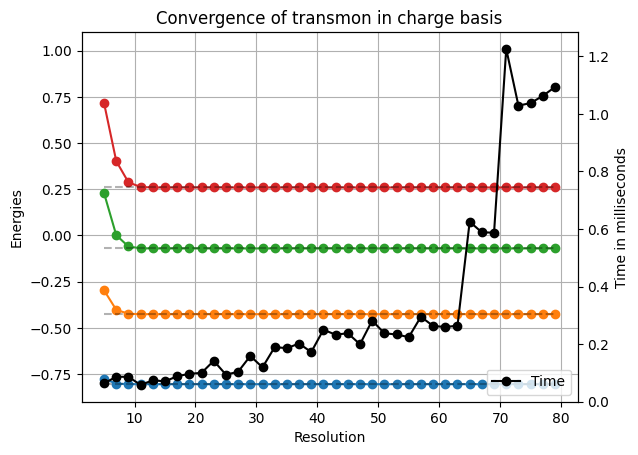

In [21]:
fig, ax1 = plt.subplots()

ax1.plot(res_array, E0, '-o')
ax1.plot([res_array[0], res_array[-1]], [E0[-1], E0[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E1, '-o')
ax1.plot([res_array[0], res_array[-1]], [E1[-1], E1[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E2, '-o')
ax1.plot([res_array[0], res_array[-1]], [E2[-1], E2[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E3, '-o')
ax1.plot([res_array[0], res_array[-1]], [E3[-1], E3[-1]], '--', color="black", alpha=0.3)
ax1.set(xlabel = "Resolution", ylabel = "Energies", title = "Convergence of transmon in charge basis")
ax1.grid()
ax1.set(ylim=(-0.9,1.1))

ax2 = ax1.twinx()

ax2.plot(res_array, tC, '-o', color = "black", label = "Time")
ax2.set(xlabel = "Resolution", ylabel="Time in milliseconds")
ax2.legend(loc = "lower right")

In [22]:
print(E0[-1], E1[-1], E2[-1], E3[-1])

-0.8051355796936833 -0.4262979938133146 -0.07041883053242741 0.2592815888865294


Here it's clear that the charge basis is much more effective for calculating the eigenvalues compared to the flux basis

#### Comparison of the computational time

Text(0.5, 1.0, 'Comparison of computational time for the transmon')

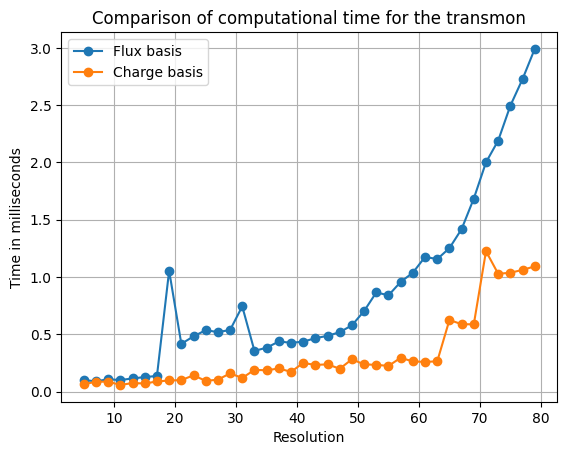

In [23]:
plt.plot(res_array, tF, '-o', label = "Flux basis")
plt.plot(res_array, tC, '-o', label = "Charge basis")
plt.grid(True)
plt.legend()
plt.xlabel("Resolution")
plt.ylabel("Time in milliseconds")
plt.title("Comparison of computational time for the transmon")

### Convergence of the Gatemon energies

In [24]:
T = 0.8
ng = 0.5
beta = 5


gatemonC = Qubits.gatemon_charge(20, 1*T/(4*beta), 1, T, ng)#(N, EC, gap, T, ng)
gatemonF = Qubits.gatemon_flux(20, 1*T/(4*beta), 1, T, ng)#(N, EC, gap, T, ng)
#gatemonF.beenakker = True

energy_charge_basis = np.zeros((4, len(res_array)))
energy_flux_basis = np.zeros((4, len(res_array)))


for i in range(len(res_array)):
    gatemonC.set_resolution(res_array[i])
    gatemonF.set_resolution(res_array[i])

    gatemonC.solve()
    gatemonF.solve()

    energy_charge_basis[:,i] = gatemonC.eigvals[:4]
    energy_flux_basis[:,i] = gatemonF.eigvals[:4]



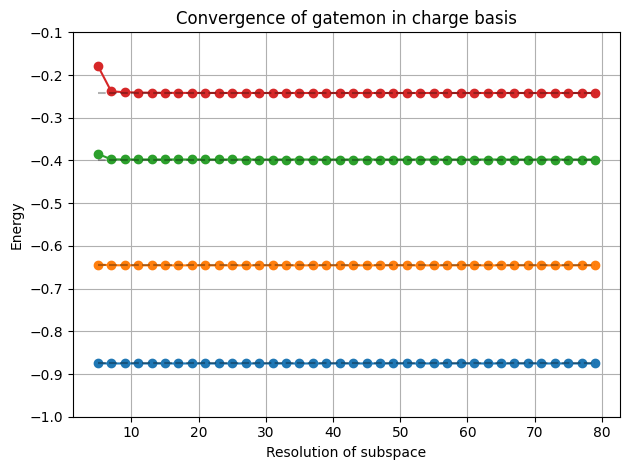

In [25]:
fig, (ax1) = plt.subplots()
ax1.plot(res_array, energy_charge_basis[0], '-o')
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[0,-1], energy_charge_basis[0,-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, energy_charge_basis[1], '-o')
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[1,-1], energy_charge_basis[1,-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, energy_charge_basis[2], '-o')
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[2,-1], energy_charge_basis[2,-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, energy_charge_basis[3], '-o')
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[3,-1], energy_charge_basis[3,-1]], '--', color="black", alpha=0.3)
ax1.set(xlabel = "Resolution of subspace", ylabel = "Energy", title = "Convergence of gatemon in charge basis")
ax1.grid()
ax1.set(ylim=(-1,-0.1))
fig.tight_layout()

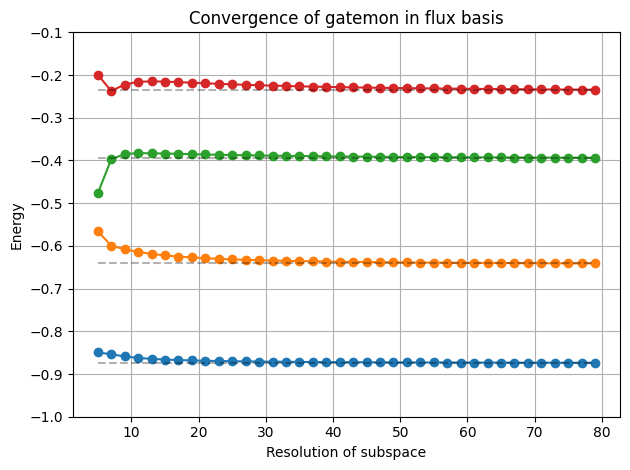

In [26]:
fig, (ax2) = plt.subplots()

ax2.plot(res_array, energy_flux_basis[0], '-o')
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[0,-1], energy_flux_basis[0,-1]], '--', color="black", alpha=0.3)
ax2.plot(res_array, energy_flux_basis[1], '-o')
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[1,-1], energy_flux_basis[1,-1]], '--', color="black", alpha=0.3)
ax2.plot(res_array, energy_flux_basis[2], '-o')
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[2,-1], energy_flux_basis[2,-1]], '--', color="black", alpha=0.3)
ax2.plot(res_array, energy_flux_basis[3], '-o')
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[3,-1], energy_flux_basis[3,-1]], '--', color="black", alpha=0.3)
ax2.set(xlabel = "Resolution of subspace", ylabel = "Energy", title = "Convergence of gatemon in flux basis")
ax2.grid()
ax2.set(ylim=(-1,-0.1))
fig.tight_layout()

array([-0.87528665, -0.64561228, -0.39774067, -0.24189216,  0.12616669,
        0.35021742,  0.55985984,  0.83500943,  1.02566467,  1.10879095,
        1.31621351])

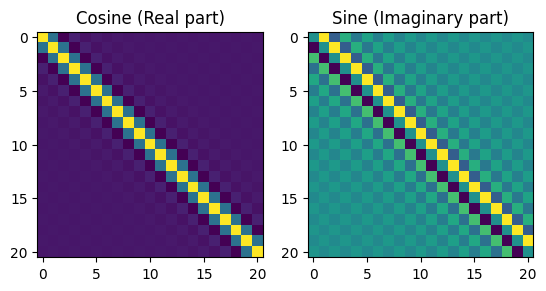

In [27]:
gatemonC.set_resolution(20)
gatemonC.verbose = True
gatemonC.T = 0.8
gatemonC.solve()

gatemonC.eigvals[:11]

In [28]:
(energy_charge_basis[:,-1]-energy_charge_basis[:,0])/energy_charge_basis[:,-1] *100

array([ 0.032189  ,  0.30350164,  3.35651773, 26.43207476])